In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import xgboost as xgb
# import catboost as ct
import seaborn as sns
from sklearn import ensemble,cross_validation,preprocessing
path='C:/Projects/Hackerearth_3/'
solution_path=path+'solutions'
%matplotlib inline
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import  preprocessing
from sklearn.manifold import TSNE
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
from collections import Counter

from tqdm import tnrange

C:\Users\sharm_000\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
test_data=pd.read_csv(path+'test.csv')

In [3]:

data=pd.read_csv(path+'train.csv',sep='|',header=None,dtype={1:object})
movies_data=pd.read_csv(path+'movies_meta.csv',sep='|')

In [4]:
data.columns=['user_id','Title','watch_time']
# movies_data.columns=['title','Genre','Language','Duration']


In [5]:
data.head()

,user_id,Title,watch_time
0,0,avan ivan,6139.0
1,0,janatha garage,6706.0
2,1,besh korechi prem korechi,1229.0
3,2,sankeerthana,2633.0
4,3,baahubali - the beginning,967.0


In [6]:
np.unique(data['user_id'])

array([     0,      1,      2, ..., 876594, 876595, 876596], dtype=int64)

In [7]:
movies_data.head()

,Title,Genre,Language,Duration
0,dil toh baccha hai ji,romance,hindi,8185.0
1,golmaal: fun unlimited,comedy,hindi,8554.0
2,fukrey,comedy,hindi,7983.0
3,dabangg 2,action,hindi,7104.0
4,bhaag milkha bhaag,drama,hindi,10689.0


In [8]:
new_data=pd.merge(data,movies_data,on='Title',how='left')

In [9]:
new_data['ratings']=((new_data['watch_time']/new_data['Duration'])*10).astype(int)

In [10]:
new_data['ratings']=np.minimum(new_data['ratings'],10)

In [11]:

new_data['aff']=new_data['watch_time']/new_data['Duration']
new_data.head()

,user_id,Title,watch_time,Genre,Language,Duration,ratings,aff
0,0,avan ivan,6139.0,comedy,tamil,7860.0,7,0.781043
1,0,janatha garage,6706.0,action,"telugu,malayalam,malayalam",9066.0,7,0.739687
2,1,besh korechi prem korechi,1229.0,romance,bengali,8614.0,1,0.142675
3,2,sankeerthana,2633.0,romance,telugu,8275.0,3,0.318187
4,3,baahubali - the beginning,967.0,action,telugu,9158.0,1,0.105591


In [12]:
user_mat=new_data.groupby('user_id').agg({'Title':'count','Duration':'mean','aff':'mean'}).reset_index()

In [13]:
user_mat.head()

,user_id,Duration,aff,Title
0,0,8463.0,0.760365,2
1,1,8614.0,0.142675,1
2,2,8275.0,0.318187,1
3,3,9158.0,0.105591,1
4,4,7099.6,0.431187,5


In [14]:
user_mat.columns[1:]

Index([u'Duration', u'aff', u'Title'], dtype='object')

In [15]:
normalizer = preprocessing.Normalizer()
X1 = normalizer.fit_transform(user_mat[user_mat.columns[1:]]) 

In [16]:
# k means determine k
distortions = []
# silhouette_dist = []
K = range(2,11)
for idx in tnrange(len(K)):
    k = K[idx]
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=777)
    kmeans = kmeans.fit(X1)
    cluster_labels = kmeans.predict(X1)
    distortions.append(sum(np.min(cdist(X1, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X1.shape[0])
#     sil_scores = []
#     for i in range(6):
#         sil_scores.append(silhouette_score(X1, cluster_labels, sample_size=10000))
#     silhouette_dist.append(np.mean(sil_scores))

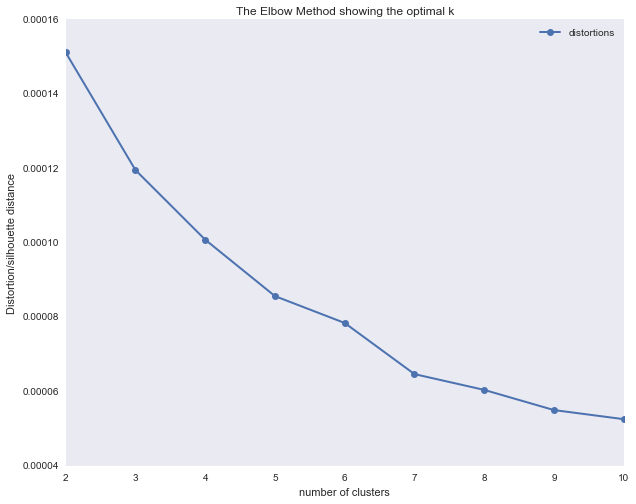

In [17]:
fig = plt.figure(figsize=(10,8))
plt.plot(K, distortions, label='distortions', lw=2, marker='o')
# plt.plot(K, silhouette_dist, label='silhouette dist', lw=2, marker='s')
plt.xlabel('number of clusters')
plt.ylabel('Distortion/silhouette distance')
plt.title('The Elbow Method showing the optimal k')
plt.grid()
plt.legend(loc='upper right')

# plt.gcf().autofmt_xdate()

plt.show()

In [18]:
kmeans = KMeans(n_clusters= 7, init='k-means++', max_iter=300,  n_jobs= -1, random_state=0)
kmeans.fit(X1)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_


In [19]:
user_mat['cluster']=labels

In [20]:
test_data['val']=1

In [21]:
new_data=pd.merge(pd.merge(new_data,user_mat[['user_id','cluster']],on='user_id'),test_data,on='user_id',how='left').fillna(0)

In [120]:
clo=1

In [121]:
clus1=new_data[new_data['cluster']==clo]
target=clus1[clus1['val']==1]
len(np.unique(target['user_id']))

789

In [122]:
base_user=clus1[clus1['val']==0]
len(np.unique(base_user['user_id']))

32672

In [124]:
import random
sam=5000

In [125]:
base_user_list=np.array(random.sample(np.unique(base_user['user_id']).tolist(),sam)).astype(int)
base_user2=base_user[base_user['user_id'].isin(base_user_list)]

In [126]:
base_user2.shape

(41020, 10)

In [127]:
final_data=pd.concat([target,base_user2])

In [128]:
final_data.shape

(47651, 10)

In [129]:
base_user2.head(2)

,user_id,Title,watch_time,Genre,Language,Duration,ratings,aff,cluster,val
47,29,exists,1824.0,horror,english,4608.0,3,0.395833,1,0.0
48,29,2 states,3843.0,romance,hindi,8597.0,4,0.447016,1,0.0


In [130]:
final_data=final_data[['user_id','Title','ratings']]#.to_csv('clus'+str(clo)+'.csv',index=False)

In [138]:
import graphlab
train_data = graphlab.SFrame(base_user2)

This non-commercial license of GraphLab Create for academic use is assigned to swapnil.sharma@brillio.com and will expire on September 08, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\SHARM_~1\AppData\Local\Temp\graphlab_server_1504904534.log.0


In [140]:
popularity_model = graphlab.popularity_recommender.create(train_data, user_id='user_id', item_id='Title', target='ratings')

Recsys training: model = popularity

Warning: Ignoring columns watch_time, Genre, Language, Duration, aff, cluster, val;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 41020 observations with 5000 users and 2099 items.

Data prepared in: 0.054037s

41020 observations to process; with 2099 unique items.

In [146]:
popularity_recomm =popularity_model.recommend(users=range(1,6),k=20)

In [147]:
popularity_recomm

user_id,Title,score,rank
1,lakshmi mahima,10.0,1
1,abodh,10.0,2
1,kraurya,10.0,3
1,arachnophobia,10.0,4
1,kalyana kacheri,10.0,5
1,navile o navile,10.0,6
1,kokkarakko,10.0,7
1,meghe dhaka tara,10.0,8
1,udayon,10.0,9
1,ishwar sakshi,10.0,10


In [131]:
from surprise import Reader, Dataset, SVD, evaluate

In [137]:
with open('clus0.csv') as f:
    all_lines = f.readlines()

# Prepare the data to be used in Surprise
reader = Reader(line_format='user_id, Title , ratings', sep=',')
data = Dataset.load_from_file('clus0.csv', reader=reader)

ValueError: line_format parameter is incorrect.

In [132]:
data = Dataset.construct_trainset()

TypeError: unbound method construct_trainset() must be called with Dataset instance as first argument (got DataFrame instance instead)

In [40]:
graphlab.get_dependencies()


By running this function, you agree to the following licenses.

* libstdc++: https://gcc.gnu.org/onlinedocs/libstdc++/manual/license.html
* xz: http://git.tukaani.org/?p=xz.git;a=blob;f=COPYING
    
Extracting xz.
Extracting gcc-libs.
Copying gcc-libs into the installation directory.


In [45]:
import graphlab

In [46]:
import graphlab
train_data = graphlab.SFrame(base_user2)

AttributeError: 'module' object has no attribute 'SFrame'

In [36]:
matri=pd.pivot_table(final_data,columns='Title',index='user_id',values='ratings',fill_value=0)

In [37]:
matri.head()

Title,& jara hatke,(500) days of summer,10 endrathukulla,10 ka dum,100 % love,100% love,10ml love,127 hours,13-padamoodu,143 and i miss you,...,zakkariyayuda gharbhinikal,zale mokale aakash,zameen,zed plus,zeher the revenge,zid,zindagi na milegi dobara,zootopia,zulfiqar,zulmi
user_id,,,,,,,,,,,,,,,,,,,,,
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
474,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
546,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
600,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import graphlab
train_data = graphlab.SFrame(ratings_base)
test_data = graphlab.SFrame(ratings_test)